In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, classification_report,roc_auc_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split,cross_val_score,KFold
import matplotlib.pyplot as plt
import os 
from sklearn.metrics import roc_curve, auc

chose_data = 'full_data_withoud_pro_oder.csv'
#chose_data = 'significant_data_05.csv'


In [3]:
data = pd.read_csv(chose_data)
total_data =  len(data.index)
print('the number of sample:',total_data)
data = data.drop(['Unnamed: 0',  'market_int','time_delta'], axis = 1)
data.keys()

the number of sample: 180519


Index(['Benefit per order', 'Latitude', 'Longitude', 'Order Item Discount',
       'Category Id', 'Order Item Discount Rate', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Late_delivery_risk', 'order_weekday',
       'shipping_weekday', 'shipping_mode_int', 'type',
       'Sales per customerlog'],
      dtype='object')

In [4]:
x_train,x_test,y_train,y_test = train_test_split(data.drop(['Late_delivery_risk'], axis = 1).values,data['Late_delivery_risk'].values,test_size = 0.3)

RandomFores

In [5]:

#from sklearn import preprocessing

#x_train  = preprocessing.normalize(x_train)
#x_test  = preprocessing.normalize(x_test)

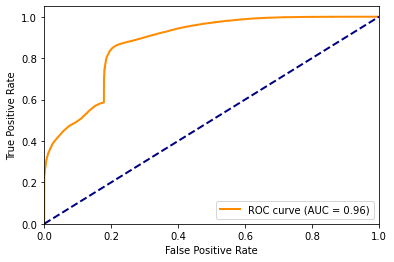

In [33]:
rf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.01, n_estimators=100,
                       verbose=0, warm_start=True)
rf.fit(x_train, y_train)
# Train a Random Forest classifier
#model = RandomForestClassifier()
#model.fit(x_train, y_train)

# Predict probabilities for the test set
y_prob = rf.predict_proba(x_test)[:, 1]

# Compute the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob)

# Compute the area under the ROC curve (AUC)
rf_roc_auc = auc(fpr_rf, tpr_rf)

# Plot the ROC curve
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

mức độ quan trọng của feature: [1.81823353e-03 4.08358000e-03 3.15199851e-03 1.53978286e-03
 6.87871543e-04 1.03387177e-03 7.18391475e-04 1.18999668e-03
 2.45599897e-04 8.05818505e-04 1.41907432e-03 7.46188398e-02
 5.61684610e-02 8.21820201e-01 2.93292666e-02 1.36901253e-03]
feature quan trọng nhất: shipping_mode_int
[13 11 12 14  1  2  0  3 10 15  7  5  9  6  4  8]


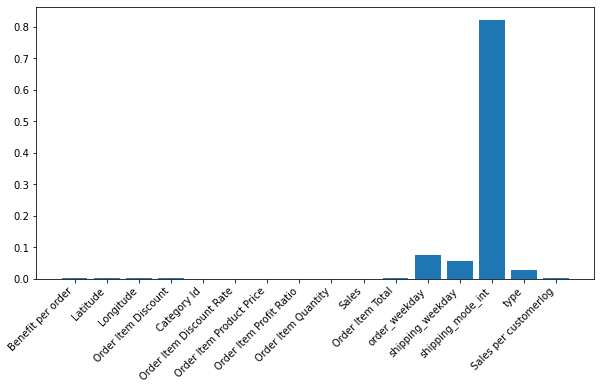

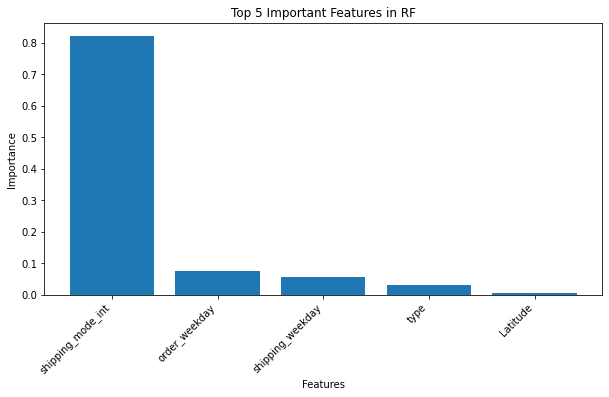

In [8]:
# biểu thị mức độ quan trọng của feature, cao nhất ứng vs quan trọng nhất 
plt.figure(figsize=(10,5))
print('mức độ quan trọng của feature:', rf.feature_importances_)
plt.bar(list(data.drop(['Late_delivery_risk'], axis = 1).keys()),rf.feature_importances_)
# Xoay trục x
plt.xticks(rotation=45, ha='right')
print('feature quan trọng nhất:', list(data.drop(['Late_delivery_risk'], axis = 1).keys())[np.argmax(rf.feature_importances_)])

import numpy as np
import matplotlib.pyplot as plt

# Đoạn code tính toán mức độ quan trọng của features và vẽ biểu đồ
feature_importances = rf.feature_importances_
feature_names = list(data.drop(['Late_delivery_risk'], axis=1).keys())
sorted_indices = np.argsort(feature_importances)[::-1]
print(sorted_indices)
top_feature_indices = sorted_indices[:5]
top_feature_names = [feature_names[i] for i in top_feature_indices]
top_feature_importances = feature_importances[top_feature_indices]

plt.figure(figsize=(10, 5))
plt.bar(top_feature_names, top_feature_importances)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 5 Important Features in RF')
plt.savefig('top_5_important_features_RF_without_no_delta.png')
plt.show()


In [9]:
y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

[[20110  4393]
 [12197 17456]]
              precision    recall  f1-score   support

           0       0.62      0.82      0.71     24503
           1       0.80      0.59      0.68     29653

    accuracy                           0.69     54156
   macro avg       0.71      0.70      0.69     54156
weighted avg       0.72      0.69      0.69     54156

0.7046957563851924


<Figure size 432x288 with 0 Axes>

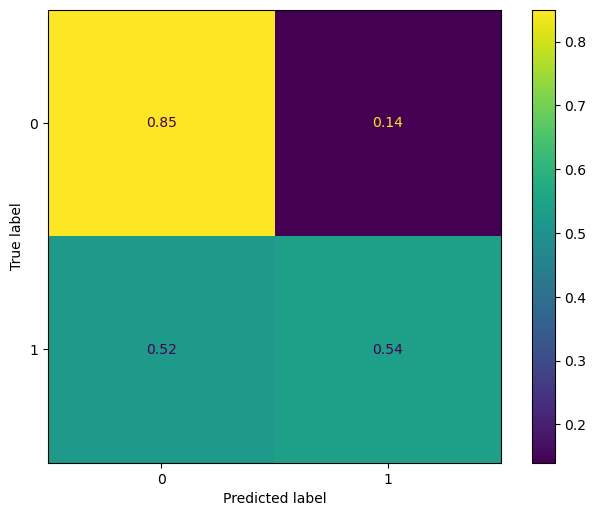

In [11]:
import numpy as np
#cm = np.asarray(cm)
cm = cm/cm.sum(axis=1)
for i in range(len(cm)):
    for j in range(len(cm)):
        cm[i][j] = round(cm[i][j],2)
        
plt.figure()
fig, ax = plt.subplots(figsize=(8,6), dpi=100)

# initialize using the raw 2D confusion matrix 
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(cm, display_labels=rf.classes_)

# set the plot title using the axes object
#ax.set(title='Confusion Matrix for the Diabetes Detection Model')

# show the plot. 
# Pass the parameter ax to show customizations (ex. title) 
display.plot(ax=ax)
fig.savefig('confusion_matrix_RF_main_no_delta.png')


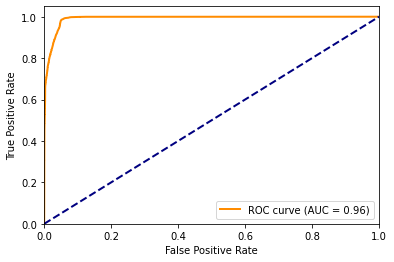

In [35]:
xgb = XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, monotone_constraints=None,
              n_estimators=140, n_jobs=4, nthread=4, num_parallel_tree=1,
              objective='binary:logistic', random_state=27, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=27, subsample=0.8,
              tree_method=None, validate_parameters=False, verbosity=None)
xgb.fit(x_train,y_train)
# Predict probabilities for the test set
y_prob = xgb.predict_proba(x_test)[:, 1]

# Compute the false positive rate (FPR), true positive rate (TPR), and thresholds
xgb_fpr, xgb_tpr, xgb_thresholds = roc_curve(y_test, y_prob)

# Compute the area under the ROC curve (AUC)
xgb_roc_auc = auc(xgb_fpr, xgb_tpr)

# Plot the ROC curve
plt.figure()
plt.plot(xgb_fpr, xgb_tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [36]:
y_pred = xgb.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

[[23048  1388]
 [  323 29397]]
              precision    recall  f1-score   support

           0       0.99      0.94      0.96     24436
           1       0.95      0.99      0.97     29720

    accuracy                           0.97     54156
   macro avg       0.97      0.97      0.97     54156
weighted avg       0.97      0.97      0.97     54156

0.966165228607176


<Figure size 432x288 with 0 Axes>

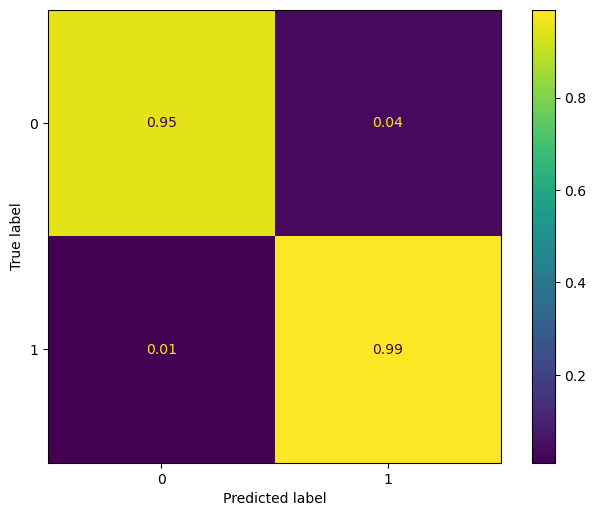

In [17]:
import numpy as np
#cm = np.asarray(cm)
cm = cm/cm.sum(axis=1)
for i in range(len(cm)):
    for j in range(len(cm)):
        cm[i][j] = round(cm[i][j],2)
        
plt.figure()
fig, ax = plt.subplots(figsize=(8,6), dpi=100)

# initialize using the raw 2D confusion matrix 
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(cm, display_labels=xgb.classes_)

# set the plot title using the axes object
#ax.set(title='Confusion Matrix for the Diabetes Detection Model')

# show the plot. 
# Pass the parameter ax to show customizations (ex. title) 
display.plot(ax=ax)
fig.savefig('confusion_matrix_XGB_main_no_delta.png')


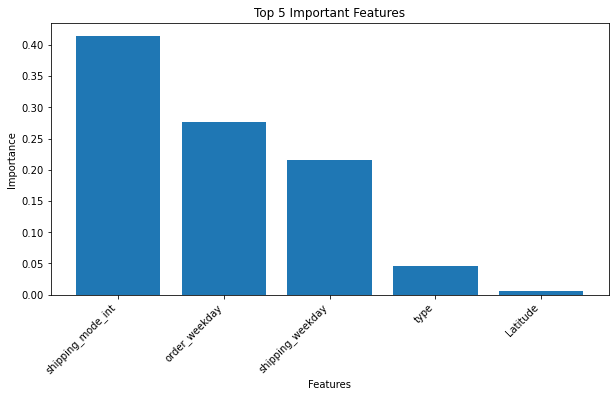

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Đoạn code tính toán mức độ quan trọng của features và vẽ biểu đồ
feature_importances = xgb.feature_importances_
feature_names = list(data.drop(['Late_delivery_risk'], axis=1).keys())
sorted_indices = np.argsort(feature_importances)[::-1]
top_feature_indices = sorted_indices[:5]
top_feature_names = [feature_names[i] for i in top_feature_indices]
top_feature_importances = feature_importances[top_feature_indices]

plt.figure(figsize=(10, 5))
plt.bar(top_feature_names, top_feature_importances)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 5 Important Features')
plt.savefig('top_5_important_features_xgb_no_delta.png')
plt.show()


*logistic regression


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#lg = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5)
x_train,x_test,y_train,y_test = train_test_split(data.drop(['Late_delivery_risk'], axis = 1).values,data['Late_delivery_risk'].values,test_size = 0.3)
# Create a Logistic Regression classifier
lg = LogisticRegression(penalty='l1', solver='liblinear')

# Train the classifier
lg.fit(x_train, y_train)

# Make predictions on the test set
y_pred = lg.predict(x_test)


# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.6922593987739124
              precision    recall  f1-score   support

           0       0.62      0.82      0.71     24436
           1       0.80      0.59      0.68     29720

    accuracy                           0.69     54156
   macro avg       0.71      0.70      0.69     54156
weighted avg       0.72      0.69      0.69     54156



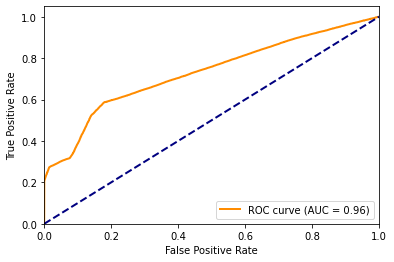

In [28]:
# Predict probabilities for the test set
y_prob = lg.predict_proba(x_test)[:, 1]

# Compute the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr_lg, tpr_lg, thresholds_lg = roc_curve(y_test, y_prob)

# Compute the area under the ROC curve (AUC)
lg_roc_auc = auc(fpr_lg, tpr_lg)

# Plot the ROC curve
plt.figure()
plt.plot(fpr_lg, tpr_lg, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [22]:
# biểu thị mức độ quan trọng của feature, cao nhất ứng vs quan trọng nhất 

importance = clf.coef_[0]
#importance is a list so you can plot it. 
feat_importances = pd.Series(importance)
feat_importances.nlargest(20).plot(kind='barh',title = 'Feature Importance')

NameError: name 'clf' is not defined

*SVM

In [23]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
svm = make_pipeline(StandardScaler(), SVC())
svm.fit(x_train, y_train)
#clf.predict(X[:2, :])

#clf.predict_proba(X[:2, :])

y_pred = svm.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
svm.score(x_test, y_test)


[[20656  3780]
 [ 1270 28450]]
              precision    recall  f1-score   support

           0       0.94      0.85      0.89     24436
           1       0.88      0.96      0.92     29720

    accuracy                           0.91     54156
   macro avg       0.91      0.90      0.90     54156
weighted avg       0.91      0.91      0.91     54156

0.9012890155887207


0.90675086786321

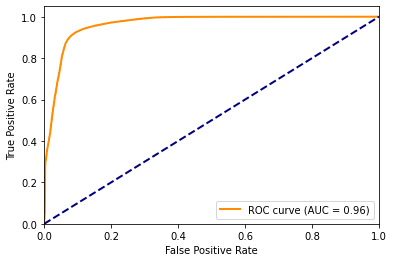

In [25]:
# Predict probabilities for the test set
y_prob =  svm.decision_function(x_test)

# Compute the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_prob)

# Compute the area under the ROC curve (AUC)
roc_auc = auc(fpr_svm, tpr_svm)

# Plot the ROC curve
plt.figure()
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

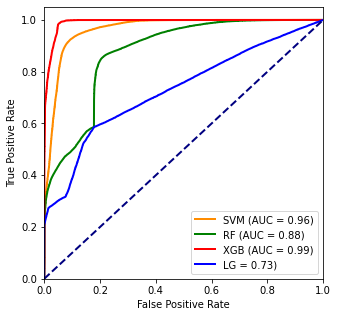

In [37]:
# Plot the ROC curve
plt.figure(figsize=(5,5))
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'SVM (AUC = {roc_auc:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'RF (AUC = {rf_roc_auc:.2f})')
plt.plot(xgb_fpr, xgb_tpr, color='red', lw=2, label=f'XGB (AUC = {xgb_roc_auc:.2f})')
plt.plot(fpr_lg, tpr_lg, color='blue', lw=2, label=f'LG = {lg_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.savefig('ROC_curve_no_delta.png')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Create a KNN classifier object
knn = KNeighborsClassifier(n_neighbors=30)  # Specify the number of neighbors (K)

# Train the classifier
knn.fit(x_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(x_test)

from sklearn.metrics import accuracy_score
# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:
print(classification_report(y_test, y_pred))

Linear Discriminant Analysis (LDA)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have your data in X (features) and y (labels)
# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an LDA classifier object
lda = LinearDiscriminantAnalysis()

# Fit the LDA model on the training data
lda.fit(x_train, y_train)

# Make predictions on the test set
y_pred = lda.predict(x_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))
#model.score(x_train, y_train)